In [3]:
import sklearn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [51]:
def hypotes(X,w):
    return np.dot(X,w)

In [53]:
def loss_func(X, y, w):
    return np.square(hypotes(X, w) - y).sum() / (2 * X.size)

In [55]:
def gradient_step(X,y,w,learn_rate):
    m=len(y)
    grad = (X.T @ (hypotes(X,w)-y))/m
    w-=learn_rate*grad
    return w

In [57]:
def gradient(X, y, learning_rate, num_iter, eps):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))

    w = np.zeros(X.shape[1])  # Initialize weights

    loss = loss_func(X, y, w)
    loss_history = [loss]

    for _ in range(num_iter):
        w = gradient_step(X, y, w, learning_rate)

        loss = loss_func(X, y, w)
        if abs(loss - loss_history[-1]) < eps:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w, loss_history

In [8]:
df = pd.read_csv("./Housing.csv")

In [15]:
df= df.iloc[:,:4]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
dtypes: int64(4)
memory usage: 17.2 KB


C:\Users\natal\AppData\Local\Temp\ipykernel_9500\2956950394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

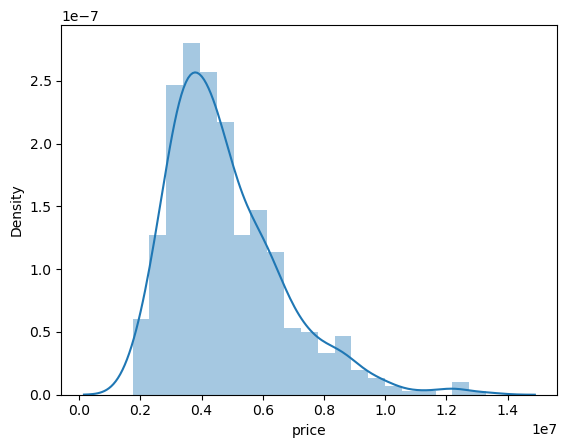

In [17]:
sns.distplot(df['price'])



C:\Users\natal\AppData\Local\Temp\ipykernel_9500\678387051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

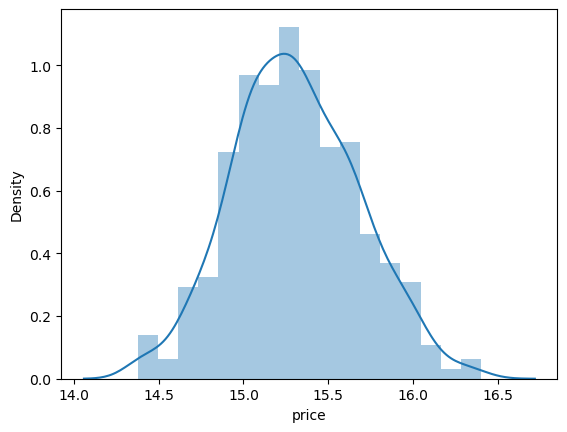

In [19]:
df['price'] = np.log(df['price'])
sns.distplot(df['price'])

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_orign=df[["area", "bathrooms", "bedrooms"]].to_numpy()
y=df["price"].to_numpy()
#y_orign=df["price"].to_numpy()
X = scaler.fit_transform(X_orign)
#y = scaler.fit_transform(y_orign)
print(X)

[[ 1.04672629  1.42181174  1.40341936]
 [ 1.75700953  5.40580863  1.40341936]
 [ 2.21823241  1.42181174  0.04727831]
 ...
 [-0.70592066 -0.57018671 -1.30886273]
 [-1.03338891 -0.57018671  0.04727831]
 [-0.5998394  -0.57018671  0.04727831]]


In [23]:
scaler.mean_, scaler.scale_

(array([5.15054128e+03, 1.28623853e+00, 2.96513761e+00]),
 array([2.16814915e+03, 5.02008423e-01, 7.37386427e-01]))

In [61]:
learning_rate = 1.001
num_iter= 10000
eps = 1e-12
w, loss_history = gradient(X, y, learning_rate, num_iter, eps)
print(w)

[15.30698688  0.16806455  0.12338059  0.06591308]


In [145]:
w = np.zeros(Xs.shape[1])

In [95]:
gd_predict_price = hypotes(X,w[1:])+w[0]

In [97]:
print(y[:10], gd_predict_price[:10])

[16.40327459 16.32103649 16.32103649 16.31817526 16.25000072 16.19967564
 16.13298426 16.13298426 16.10501041 16.09789294] [15.75083212 16.36175342 15.85833333 15.75703334 15.50505818 15.91341984
 16.0865237  16.76657707 15.55776853 15.53199428]


In [99]:
from sklearn.metrics import mean_squared_error, r2_score
# MSE
# mean_squared_error = np.sum((y - y_hat.T)**2) / len(y)

# The mean squared error
print(f"MSE gradient descent: {mean_squared_error(y, gd_predict_price)}")
print(f"R2: {r2_score(y, gd_predict_price)}")

MSE gradient descent: 0.07295613428019906
R2: 0.47229895145669354


Analytical method

In [101]:
# Add a column with 1 for bias
Xb = np.hstack((np.ones((X.shape[0], 1)), X))

# Beregn den inverse av produktet av transponert Xb_scaled og Xb_scaled
z = np.linalg.pinv(np.dot(Xb.T, Xb))

# Beregn parameterne ved hjelp av normal-ligningen
w_analytic = np.dot(z, np.dot(Xb.T, y))

print("Parameters (w):", w_analytic)

Parameters (w): [15.30698688  0.16806396  0.12337974  0.06591226]


In [105]:
from sklearn.linear_model import LinearRegression
model= LinearRegression().fit(X, y)

In [107]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 3,
 'coef_': array([0.16806396, 0.12337974, 0.06591226]),
 'rank_': 3,
 'singular_': array([28.54332915, 21.92450924, 18.42808334]),
 'intercept_': 15.306986880099473}

In [109]:
y_pred=model.predict(X)
print(f"MSE sklearn: {mean_squared_error(y, y_pred)}")
print(f"  R2: {r2_score(y, y_pred)}")

MSE sklearn: 0.07295613427760893
  R2: 0.47229895147542833
